# Antes de empezar

## 1. Problemas para añadir la constante

Durante clase algunas personas se dieron cuenta que tras ejecutar el código no obtenían ningún resultado en sus dataframes:

<center>
<code>X=sm.add_constant(X)</code>
</center>

Por un momento pensé que la explicación podía residir en las versiones de Python o de las librerías que estábamos usando, pero en realidad es bastante más sencilla.

Miren, voy a importar el archivo, por si las dudas elimino variables no-numéricas y filas en blanco, y le pediré que añade una constante:

In [59]:
import pandas as pd
import statsmodels.api as sm
#Importo
bdd=pd.read_csv('rawdata/clases/habitaclia4043.csv')

# Obtener las columnas que no son numéricas
no_numericas = bdd.select_dtypes(exclude=['number']).columns
no_numericas

#Eliminar columnas no numéricas
bdd=bdd.drop(no_numericas, axis=1)

#Eliminar filas en blanco
bdd=bdd.dropna()

#Añado la constante
prueba=sm.add_constant(bdd)

prueba.head()

,Unnamed: 0,OBJECTID_1,codigo_inmueble1,Lat_X,Lon_Y,precio_eur,superficie,superficie_2,Unit_price,Ln_total_pr,...,Estado_contemporaneidad_calidad,Ausencia_singulares_presencia_arm_cocina,Muestra_2023,EPC_A_emision_2023,EPC_B_emision_2023,EPC_C_emision_2023,EPC_D_emision_2023,EPC_E_emision_2023,EPC_F_emision_2023,EPC_G_emision_2023
0,0,1.0,2.872004e+12,2.114740,41.375476,345000.0,86.0,7396.0,4011.627907,12.751300,...,0.191077,-0.172569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,5.020004e+12,2.132418,41.359122,370000.0,97.0,9409.0,3814.432990,12.821258,...,0.584078,-2.662470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3.0,8.700366e+10,2.100272,41.369421,169000.0,77.0,5929.0,2194.805195,12.037654,...,-0.151147,0.971514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.0,5.000037e+11,2.114315,41.370422,229000.0,95.0,9025.0,2410.526316,12.341477,...,-0.185340,1.067921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.0,5.380035e+11,2.099040,41.359801,393000.0,163.0,26569.0,2411.042945,12.881565,...,1.479141,0.936917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**¡Nada!**

Pero miren lo que pasa si creo un objeto seleccionando algunas variables al azar de `bdd`.

In [61]:
prueba2=bdd[['codigo_inmueble1', 'Lat_X', 'Lon_Y', 'precio_eur', 'superficie', 'superficie_2', 'Unit_price', 'Ln_total_pr', 'Ln_unit_pr', 'numero_habitaciones', 'numero_bano', 'ratio_bano_hab', 'numero_aseo', 'ascensor', 'interac_planta', 'numero_de_piso', 'anyo_constr']]
prueba2=sm.add_constant(prueba2)

prueba2.head()

,const,codigo_inmueble1,Lat_X,Lon_Y,precio_eur,superficie,superficie_2,Unit_price,Ln_total_pr,Ln_unit_pr,numero_habitaciones,numero_bano,ratio_bano_hab,numero_aseo,ascensor,interac_planta,numero_de_piso,anyo_constr
0,1.0,2.872004e+12,2.114740,41.375476,345000.0,86.0,7396.0,4011.627907,12.751300,8.296952,3.0,3.0,1.000000,1.0,1.0,2.0,2.0,2005.0
1,1.0,5.020004e+12,2.132418,41.359122,370000.0,97.0,9409.0,3814.432990,12.821258,8.246547,3.0,2.0,0.666667,0.0,1.0,3.0,3.0,2009.0
2,1.0,8.700366e+10,2.100272,41.369421,169000.0,77.0,5929.0,2194.805195,12.037654,7.693849,3.0,2.0,0.666667,0.0,-1.0,-3.0,3.0,1983.0
3,1.0,5.000037e+11,2.114315,41.370422,229000.0,95.0,9025.0,2410.526316,12.341477,7.787600,4.0,2.0,0.500000,1.0,1.0,2.0,2.0,0.0
4,1.0,5.380035e+11,2.099040,41.359801,393000.0,163.0,26569.0,2411.042945,12.881565,7.787815,4.0,3.0,0.750000,1.0,1.0,2.0,2.0,2019.0


Es sólo eso: la librería `statsmodels` funciona así, puede añadir la constante sólo sobre objetos que hayan seleccionado previamente algunas variables. Da igual si son 1, 2 o 1000 variables las seleccionadas. Necesita siempre ese paso previo.

Si pese a ello mantienen problemas para añadir la constante, escríbanme por correo (jose.carlos.rojas@upc.edu) con una captura de pantalla y el cuaderno que han usado para buscar alguna solución.

## 2. Preparación para el análisis

### 2.1. Paso previo

He notado que en la última clase, para resolver el ejercicio, estábamos tratando de hacer código sin pensar muy bien cuál era nuestra objetivo. Eso nos ha llevado a que, en muchos casos, siguieran los pasos exactos del ejercicio que hicimos en clase con `HousingPrices.csv`, sin caer en cuenta que para este ejercicio debemos establecer una metodología diferente por tratarse de una base de datos de alrededor de 200 variables (cuando revisen el siguiente cuaderno van a entender a qué me refiero).

Lo que quisiera es que antes de empezar a codear se detengan a pensar qué buscan hacer con el ejercicio: ¿Un modelo para predecir los precios? ¿Para predecir y entender a la vez? Y a continuación qué pasos van a ser necesarios para ese objetivo: ¿Cómo se van a organizar los datos? ¿Deberemos eliminar algunas columnas? ¿Algunas filas? ¿Tiene sentido ver una matriz de correlación de 200 x 200 variables? 

Con eso, estructuren una lista de pasos a seguir y, por si acaso, un plan B en caso el resultado que encuentren no sea el esperado. Algo como esto, pero a mano:

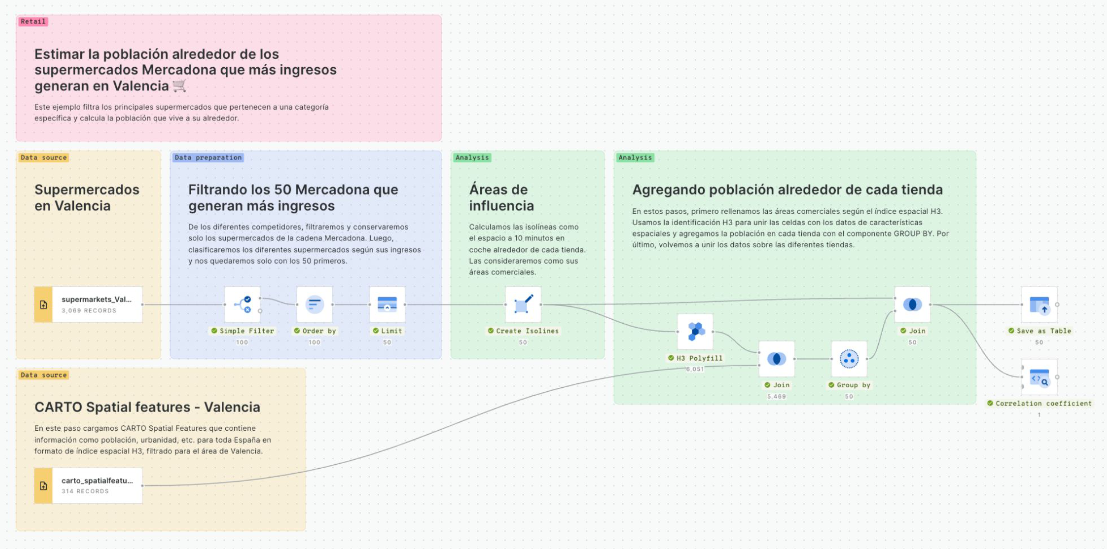

Van a notar que les será más sencillo empezar a codear (o pedirle a ChatGPT que codee por ustedes).

### 2.2. Correcciones sobre la clase

Les había comentado que el estadístico *Omnibus* nos permitía confirmar la distribución de los residuos del modelo, que es uno de los supuestos a cumplir. Vamos a dejar de lado su revisión porque en realidad su uso es distinto. En cambio, vamos a concentrarnos únicamente en el histograma con la campana de Gauss. 

### 2.3. Código al que prestar atención

En muchas celdas de código del siguiente cuaderno les pongo una señal de advertencia, que es `##`. Por ejemplo:

In [ ]:
X_mejor=bdd[['num_banos','num_habitaciones','dum_mar_200m']]

# Calcular el VIF para cada variable independiente
vif = pd.DataFrame()
vif["Variable"] = X_mejor.columns ## revisar 'X_mejor' ##
vif["VIF"] = [variance_inflation_factor(X_mejor.values, i) ## revisar 'X_mejor' ##
              for i in range(X_mejor.shape[1])] ## revisar 'X_mejor' ##

# Imprimir el resultado
print(vif)

En este código (que no es necesario ejecutar) les indico que yo estoy nombrando a un objeto `X_mejor`, que es el que contiene todas mis variables $X$. Y es sobre él que luego calculo el VIF. 

Si ustedes le hubieran llamado `X_prueba`, entonces en las siguientes líneas de código también tendría que hacer referencia a `X_prueba` y ya no a `X_mejor`.

### 2.4. Recomendación final

Dupliquen el cuaderno `3-2-Resolucion.ipynb` dando clic derecho y trabajen sobre la copia (a la cual pueden renombrar). En la copia, váyanse a *Kernel* > *Restart Kernel and Clear All Outputs* para seguir el paso a paso de la resolución y no se mareen con el orden de las celdas. 

Si por algún motivo se pierden, siempre pueden volver al cuaderno original.

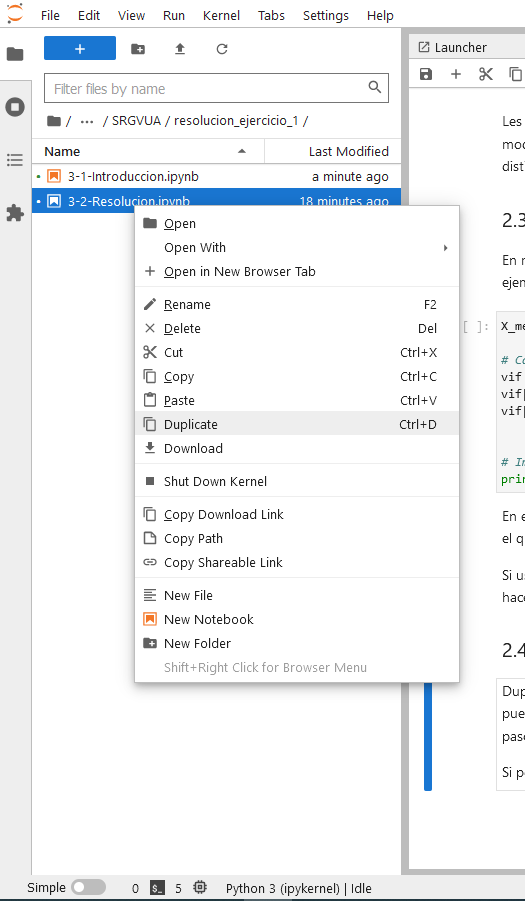

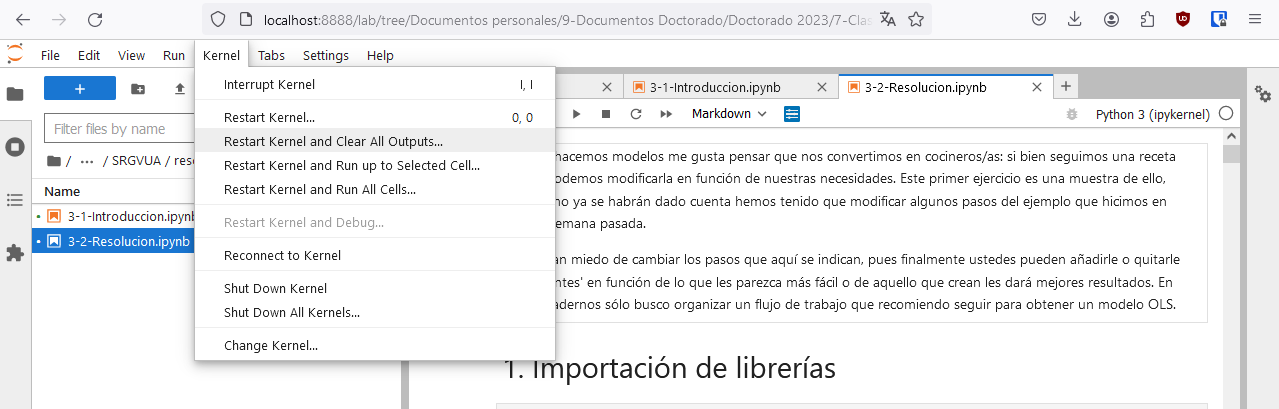